In [2]:
from IPython.display import YouTubeVideo
import random
from scipy.spatial import distance

# calculate euclidean distance
def euc(a, b):
    return distance.euclidean(a, b)


# scrappy classifier based on Knn

class ScrappyKNN():
    # fit method learns
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    # predict method predicts :)
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train)
            predictions.append(label)
        return predictions

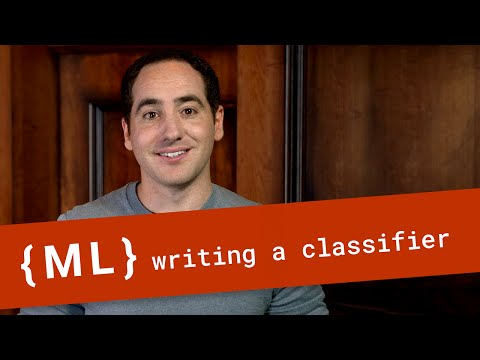

In [3]:
YouTubeVideo('AoeEHqVSNOw')

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data # feature
y = iris.target # label


# cross validation helps to avoid overfittins
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

# classifier nr. 1 - decision tree

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

In [18]:
predictions = my_classifier.predict(X_test)
print(predictions)

[0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]


In [20]:
# compare to accurate results / metrics

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.293333333333


# in Knn we calculate the euclidean distance of features (if 2 features = 2d / or  three featres = 3d we can visualize), but we can also calculate more dismentions similarly

\begin{align}
\sqrt{\sum_{i=1}^n (x_i-y_i)^2} 
\end{align}

In [45]:
class ScrappyKNN_v2():
    # fit method learns
    # 1-knn 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closes(row)
            predictions.append(label)
        return predictions
    
    def closes(self, row):
        best_dist = euc(row, self.X_train[0]) # at beginning we assume something
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_index = i
        return self.y_train[best_index]

In [48]:
my_classifier_v2 = ScrappyKNN_v2()

my_classifier_v2.fit(X_train, y_train)


predictions = my_classifier_v2.predict(X_test)
# compare to acurate results / mettrics

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.613333333333
